In [1]:
import numpy as np
from tqdm import tqdm
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import pickle

In [2]:
num_CTRL = 1723
num_RETT = 3595

## nearest_distances_ctrl

In [4]:
target = "h3k27ac2ctcf"
# target = "ctcf2h3k27ac"

if target=="h3k27ac2ctcf":
    nearest_distances_title = "H3K27ac to CTCF"
elif target=="ctcf2h3k27ac":
    nearest_distances_title = "CTCF to H3K27ac" 
    
with open(f'{target}_nearest_distances_rett.pkl', 'rb') as f:
    nearest_distances_rett = pickle.load(f)
    
with open(f'{target}_nearest_distances_ctrl.pkl', 'rb') as f:
    nearest_distances_ctrl = pickle.load(f)

In [5]:
import itertools
merged_nearest_distances_ctrl = list(itertools.chain(*nearest_distances_ctrl))
merged_nearest_distances_rett = list(itertools.chain(*nearest_distances_rett))
print(f"merged_nearest_distances_ctrl: {len(merged_nearest_distances_ctrl)}")
print(f"merged_nearest_distances_rett: {len(merged_nearest_distances_rett)}")

merged_nearest_distances_ctrl: 185198
merged_nearest_distances_rett: 335673


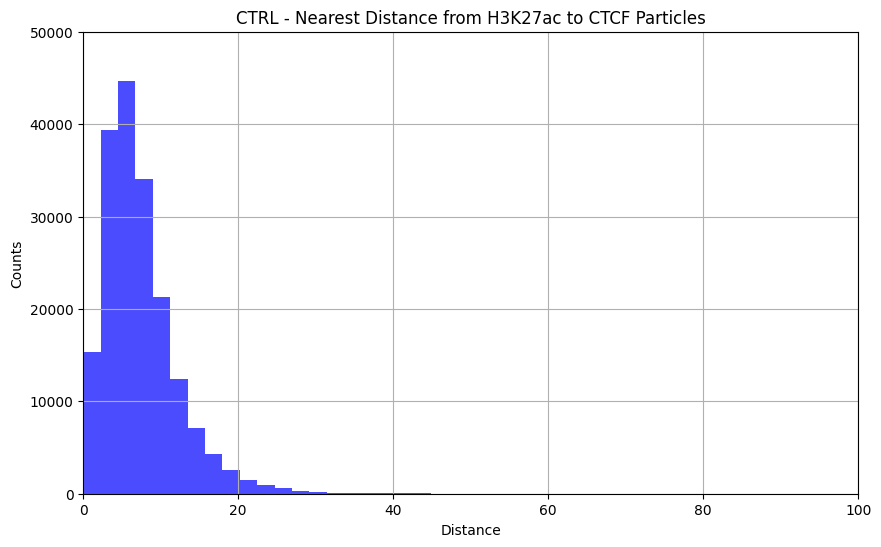

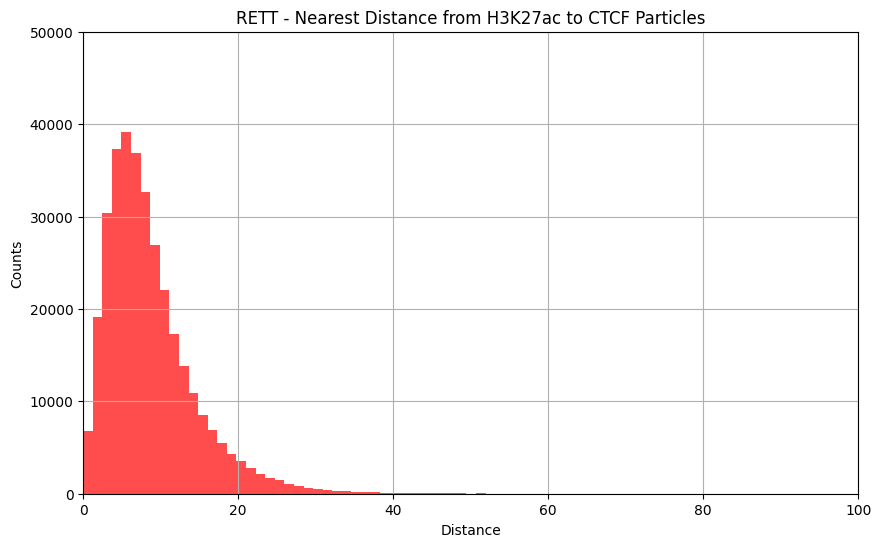

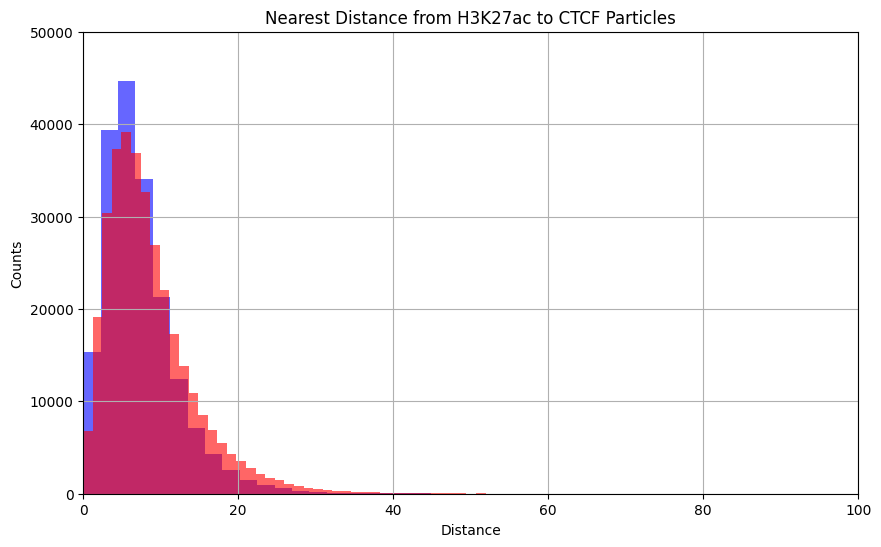

In [6]:
if target=="h3k27ac2ctcf": 
    ylim = 50000
elif target=="ctcf2h3k27ac": 
    ylim = 75000

title = ["CTRL", "RETT"]
color = ["blue", "red"]
merged_nearest_distances = [merged_nearest_distances_ctrl, merged_nearest_distances_rett]
for i in range(2):
    # 绘制最近距离的直方图
    plt.figure(figsize=(10, 6))
    plt.hist(merged_nearest_distances[i], bins=100, density=False, alpha=0.7, color=color[i])
    plt.title(f'{title[i]} - Nearest Distance from {nearest_distances_title} Particles')
    plt.xlabel('Distance')
    plt.ylabel('Counts')
    plt.xlim(0, 100)
    plt.ylim(0, ylim)
    plt.grid(True)
    plt.show()
    
#     plt.figure(figsize=(10, 6))
#     counts, bin_edges = np.histogram(merged_nearest_distances[i], bins=100)
#     bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
#     plt.bar(bin_centers, counts, width=bin_edges[1] - bin_edges[0], color=color[i], alpha=0.7, edgecolor='black')
#     plt.title(f'{title[i]} - Nearest Distance from {nearest_distances_title} Particles')
#     plt.xlabel('Distance')
#     plt.ylabel('Counts')
#     plt.xlim(0, 100)
#     plt.ylim(0, ylim)
#     plt.grid(True)
#     plt.show()

# 绘制最近距离的直方图
plt.figure(figsize=(10, 6))
if target=="h3k27ac2ctcf":
    plt.hist(merged_nearest_distances_ctrl, bins=100, density=False, alpha=0.6, color='blue')
    plt.hist(merged_nearest_distances_rett, bins=100, density=False, alpha=0.6, color='red')
elif target=="ctcf2h3k27ac":
    plt.hist(merged_nearest_distances_rett, bins=100, density=False, alpha=0.6, color='red')
    plt.hist(merged_nearest_distances_ctrl, bins=100, density=False, alpha=0.6, color='blue')
plt.title(f'Nearest Distance from {nearest_distances_title} Particles')
plt.xlabel('Distance')
plt.ylabel('Counts')
plt.xlim(0, 100)
plt.ylim(0, ylim)
plt.grid(True)
plt.show()

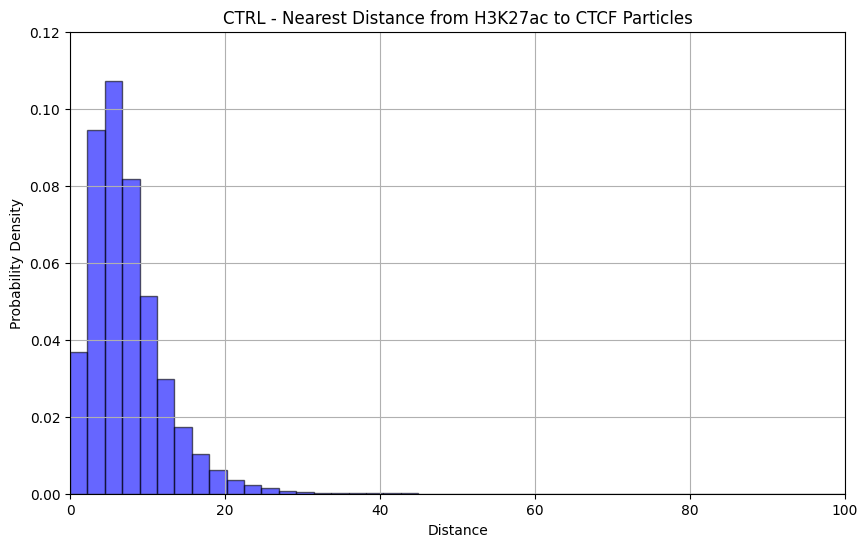

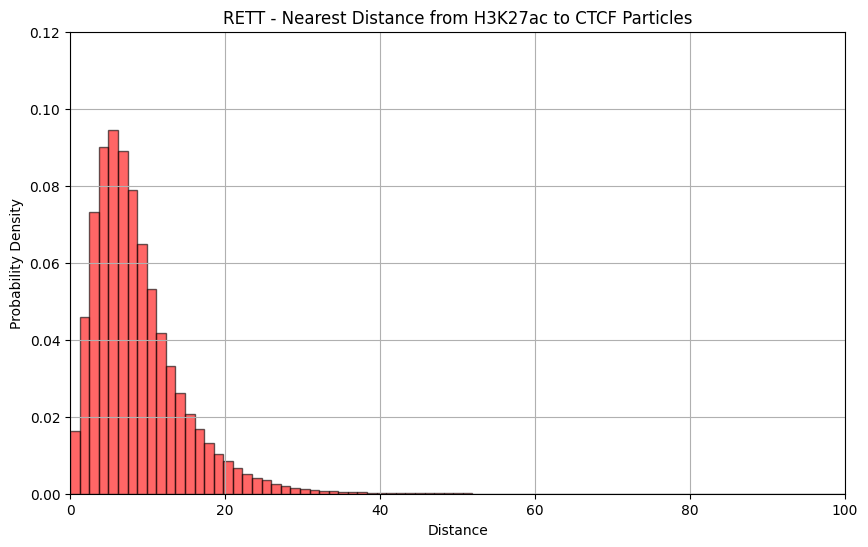

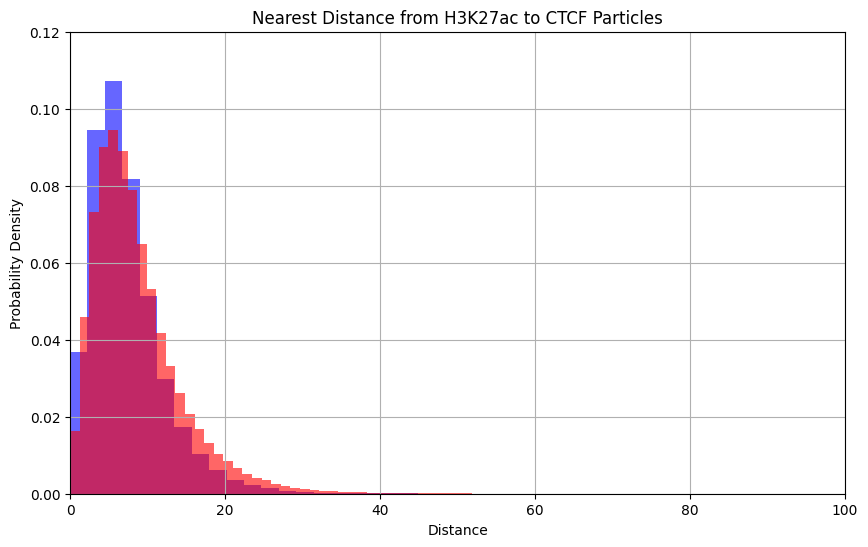

In [7]:
ylim = 0.12
title = ["CTRL", "RETT"]
color = ["blue", "red"]
merged_nearest_distances = [merged_nearest_distances_ctrl, merged_nearest_distances_rett]
for i in range(2):
    # 绘制最近距离的直方图
    plt.figure(figsize=(10, 6))
    plt.hist(merged_nearest_distances[i], bins=100, density=True, alpha=0.6, color=color[i], edgecolor='black')
    plt.title(f'{title[i]} - Nearest Distance from {nearest_distances_title} Particles')
    plt.xlabel('Distance')
    plt.ylabel('Probability Density')
    plt.xlim(0, 100)
    plt.ylim(0, ylim)
    plt.grid(True)
    plt.show()
    
#     plt.figure(figsize=(10, 6))
#     counts, bin_edges = np.histogram(merged_nearest_distances[i], bins=100)
#     possibility = counts / sum(counts)

#     bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

#     print(sum(possibility))
#     print(bin_centers)

#     plt.bar(bin_centers, possibility, color=color[i], alpha=0.7, edgecolor='black')
#     plt.title(f'{title[i]} - Nearest Distance from {nearest_distances_title} Particles')
#     plt.xlabel('Distance')
#     plt.ylabel('Probability Density')
#     plt.xlim(0, 100)
#     plt.ylim(0, ylim)
#     plt.grid(True)
#     plt.show()

# 绘制最近距离的直方图
plt.figure(figsize=(10, 6))
plt.hist(merged_nearest_distances_ctrl, bins=100, density=True, alpha=0.6, color='blue')
plt.hist(merged_nearest_distances_rett, bins=100, density=True, alpha=0.6, color='red')
plt.title(f'Nearest Distance from {nearest_distances_title} Particles')
plt.xlabel('Distance')
plt.ylabel('Probability Density')
plt.xlim(0, 100)
plt.ylim(0, ylim)
plt.grid(True)
plt.show()


# plt.figure(figsize=(10, 6))
# for i in range(2):
#     counts, bin_edges = np.histogram(merged_nearest_distances[i], bins=100)
#     possibility = counts / sum(counts)
#     bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
#     plt.bar(bin_centers, possibility, width=bin_edges[1] - bin_edges[0], color=color[i], alpha=0.6)
# plt.title(f'Nearest Distance from {nearest_distances_title} Particles')
# plt.xlabel('Distance')
# plt.ylabel('Probability Density')
# plt.xlim(0, 100)
# plt.ylim(0, ylim)
# plt.grid(True)
# plt.show()

## average_counts_per_radius_rett

In [2]:
target = "h3k27ac2ctcf"
# target = "ctcf2h3k27ac"

if target=="h3k27ac2ctcf":
    average_counts_per_radius_title = "Average Number of CTCF Particles within Different Radii around H3K27ac Particles"
    delta_counts_per_radius_title = 'Rate of Change of CTCF Particles Count vs Radius'
elif target=="ctcf2h3k27ac":
    average_counts_per_radius_title = "Average Number of H3K27ac Particles within Different Radii around CTCF Particles"
    delta_counts_per_radius_title = 'Rate of Change of H3K27ac Particles Count vs Radius'
    
with open(f'{target}_average_counts_per_radius_rett.pkl', 'rb') as f:
    average_counts_per_radius_rett = pickle.load(f)
    
with open(f'{target}_average_counts_per_radius_ctrl.pkl', 'rb') as f:
    average_counts_per_radius_ctrl = pickle.load(f)

In [8]:
print(f"CTRL - mean of {target[:5]} spots in one nucleus: ", len(merged_nearest_distances_ctrl)/len(average_counts_per_radius_ctrl))
print(f"RETT - mean of {target[:5]} spots in one nucleus: ", len(merged_nearest_distances_rett)/len(average_counts_per_radius_rett))

CTRL - mean of h3k27 spots in one nucleus:  107.48578061520604
RETT - mean of h3k27 spots in one nucleus:  93.37218358831711


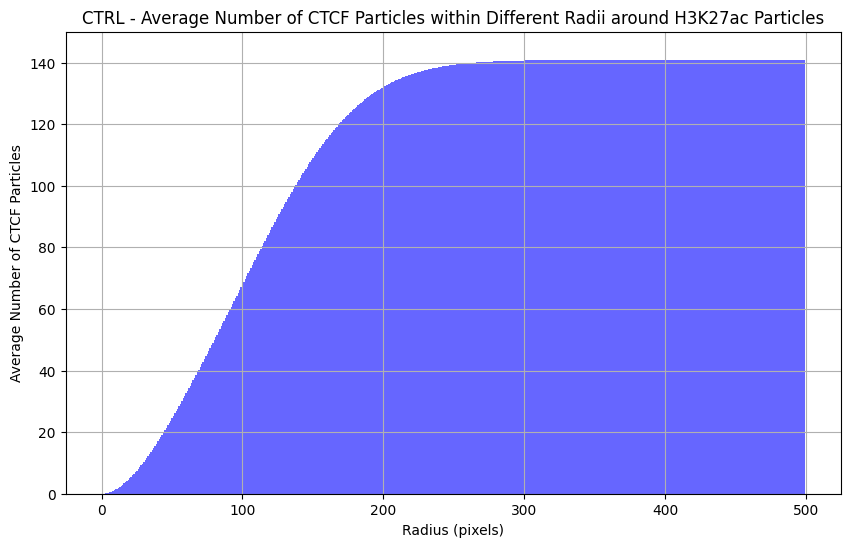

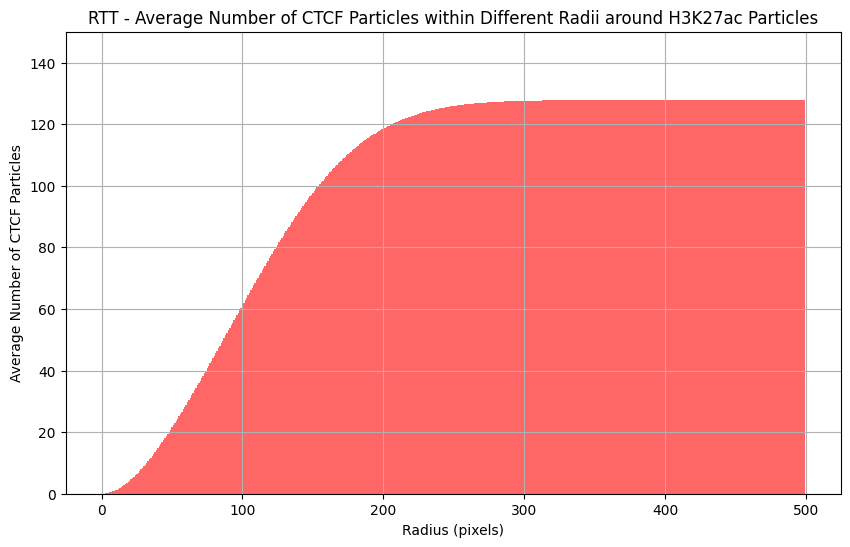

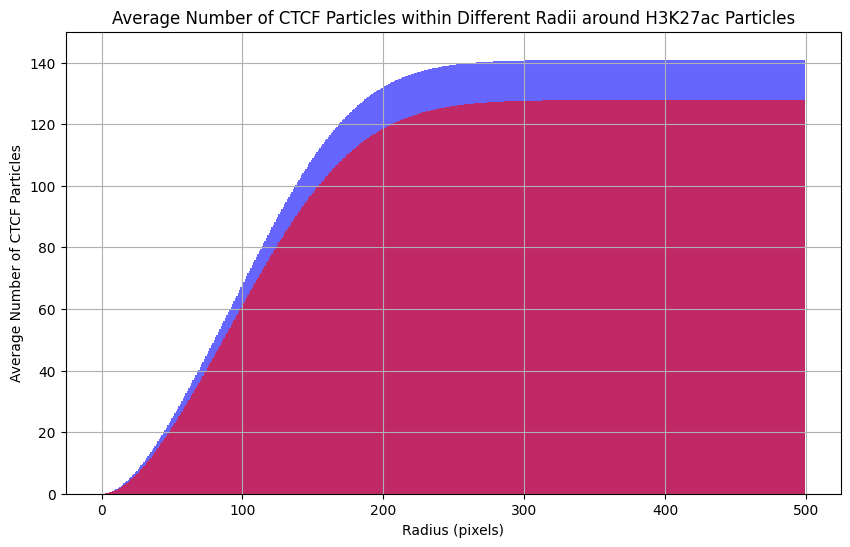

In [9]:
maxradii=500
ylim = 150
merge_average_counts_per_radius_rett = {radius: 0 for radius in range(maxradii)}
merge_average_counts_per_radius_ctrl = {radius: 0 for radius in range(maxradii)}

for i in range(maxradii):
    for rett in average_counts_per_radius_rett:
        merge_average_counts_per_radius_rett[i] += rett[i]
    merge_average_counts_per_radius_rett[i]/=len(average_counts_per_radius_rett)

    for ctrl in average_counts_per_radius_ctrl:
        merge_average_counts_per_radius_ctrl[i] += ctrl[i]
    merge_average_counts_per_radius_ctrl[i]/=len(average_counts_per_radius_ctrl)

plt.figure(figsize=(10, 6))
plt.bar(merge_average_counts_per_radius_ctrl.keys(), merge_average_counts_per_radius_ctrl.values(), width=1, color='blue', alpha=0.6)
plt.title(f'CTRL - {average_counts_per_radius_title}')
plt.xlabel('Radius (pixels)')
plt.ylabel('Average Number of CTCF Particles')
plt.ylim(0,ylim)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(merge_average_counts_per_radius_rett.keys(), merge_average_counts_per_radius_rett.values(), width=1, color='red', alpha=0.6)
plt.title(f'RTT - {average_counts_per_radius_title}')
plt.xlabel('Radius (pixels)')
plt.ylabel('Average Number of CTCF Particles')
plt.ylim(0,ylim)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(merge_average_counts_per_radius_ctrl.keys(), merge_average_counts_per_radius_ctrl.values(), width=1, color='blue', alpha=0.6)
plt.bar(merge_average_counts_per_radius_rett.keys(), merge_average_counts_per_radius_rett.values(), width=1, color='red', alpha=0.6)
plt.title(f'{average_counts_per_radius_title}')
plt.xlabel('Radius (pixels)')
plt.ylabel('Average Number of CTCF Particles')
plt.ylim(0,ylim)
plt.grid(True)
plt.show()

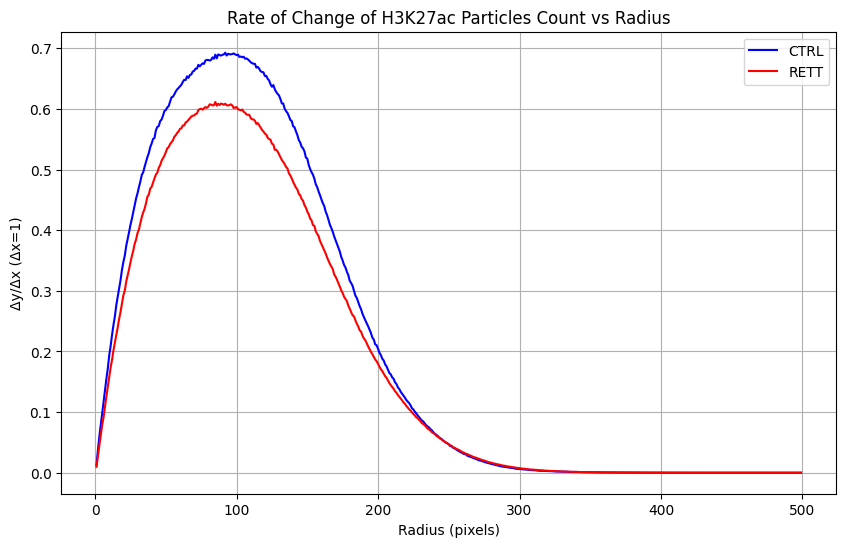

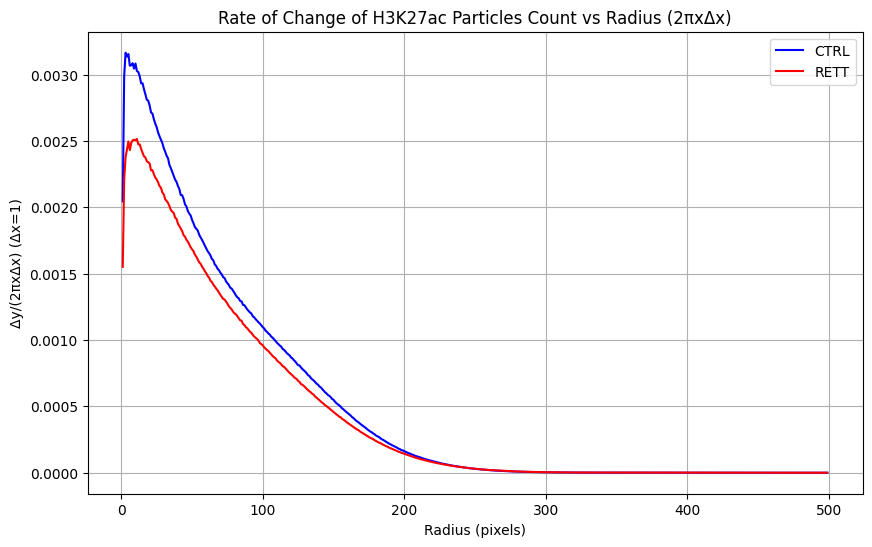

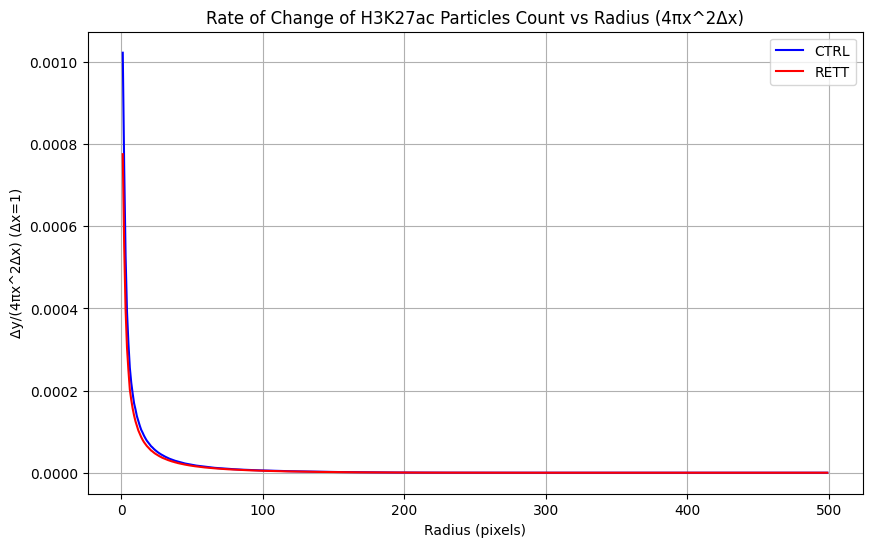

In [111]:
delta_x = 1
color = ["blue", "red"]
state = ["CTRL", "RETT"]
average_counts_per_radius = [merge_average_counts_per_radius_ctrl, merge_average_counts_per_radius_rett]

plt.figure(figsize=(10, 6))
for i in range(2):
    radii = np.array(list(average_counts_per_radius[i].keys()))
    counts = np.array(list(average_counts_per_radius[i].values()))
    # 计算差分值 (dy/dx)
    dy_dx = (counts[delta_x:] - counts[:-delta_x]) / delta_x 
    
    # 绘制差分值曲线图
    plt.plot(radii[delta_x:], dy_dx, label=state[i], color=color[i])
    plt.title(f'{delta_counts_per_radius_title}')
    plt.xlabel('Radius (pixels)')
    plt.ylabel(f'Δy/Δx (Δx={delta_x})')
    plt.legend()
    plt.grid(True)
    
plt.show()

plt.figure(figsize=(10, 6))
for i in range(2):
    radii = np.array(list(average_counts_per_radius[i].keys()))
    counts = np.array(list(average_counts_per_radius[i].values()))
    # 计算除以 2πx*Δx 
    dy_dx_2pi = (counts[delta_x:] - counts[:-delta_x]) / (2*np.pi*(radii[delta_x:]) * delta_x)
    # dy_dx_2pi = counts[delta_x:] / (2*np.pi*(radii[delta_x:]) * delta_x)
    
    # 绘制差分值曲线图 - 除以 2πx*Δx
    plt.plot(radii[delta_x:], dy_dx_2pi, label=state[i], color=color[i])
    plt.title(f'{delta_counts_per_radius_title} (2πxΔx)')
    plt.xlabel('Radius (pixels)')
    plt.ylabel(f'Δy/(2πxΔx) (Δx={delta_x})')
    plt.legend()
    plt.grid(True)
    
plt.show()


plt.figure(figsize=(10, 6))
for i in range(2):
    radii = np.array(list(average_counts_per_radius[i].keys()), dtype=float)
    radii[0] += 1e-1
    counts = np.array(list(average_counts_per_radius[i].values()))
    # 计算除以 4πx^2*Δx 
    dy_dx_4pi_x2 = (counts[delta_x:] - counts[:-delta_x]) / (4*np.pi*(radii[delta_x:])**2 * delta_x)
    # dy_dx_4pi_x2 = counts[delta_x:] / (4*np.pi*(radii[delta_x:])**2 * delta_x)
    
    # 绘制差分值曲线图 - 除以 4πx^2*Δx
    plt.plot(radii[delta_x:], dy_dx_4pi_x2, label=state[i], color=color[i])
    plt.title(f'{delta_counts_per_radius_title} (4πx^2Δx)')
    plt.xlabel('Radius (pixels)')
    plt.ylabel(f'Δy/(4πx^2Δx) (Δx={delta_x})')
    plt.legend()
    plt.grid(True)
    
plt.show()

499


(0.0, 50.0)

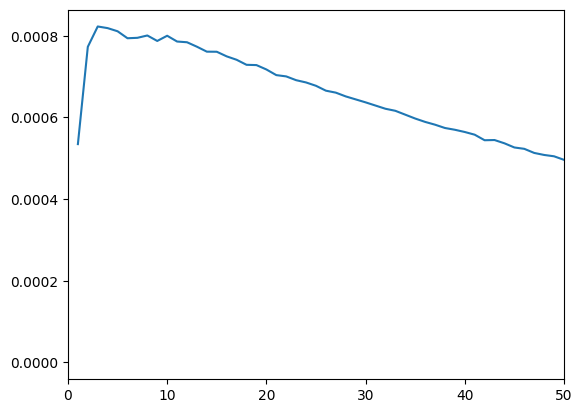

In [89]:
radii = np.array(list(merge_average_counts_per_radius_ctrl.keys()))
counts = np.array(list(merge_average_counts_per_radius_ctrl.values()))
dy_dx = (counts[1:] - counts[:-1]) / (2*np.pi*(radii[1:]) * delta_x)
print(len(dy_dx))
plt.plot(radii[1:], dy_dx)
plt.xlim(0,50)

# DEBUG

In [ ]:
target = "h3k27ac2ctcf"

with open(f'{target}_nearest_distances_rett.pkl', 'rb') as f:
    nearest_distances_rett = pickle.load(f)

with open(f'{target}_nearest_distances_ctrl.pkl', 'rb') as f:
    nearest_distances_ctrl = pickle.load(f)
    
with open(f'{target}_average_counts_per_radius_rett.pkl', 'rb') as f:
    average_counts_per_radius_rett = pickle.load(f)
    
with open(f'{target}_average_counts_per_radius_ctrl.pkl', 'rb') as f:
    average_counts_per_radius_ctrl = pickle.load(f)

In [ ]:
import itertools
merged_nearest_distances_ctrl = list(itertools.chain(*nearest_distances_ctrl))
merged_nearest_distances_rett = list(itertools.chain(*nearest_distances_rett))
print(f"merged_nearest_distances_ctrl: {len(merged_nearest_distances_ctrl)}")
print(f"merged_nearest_distances_rett: {len(merged_nearest_distances_rett)}")

In [ ]:
data = merged_nearest_distances_ctrl

# hist
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.hist(data, bins=100, density=False, alpha=0.7, color='blue', edgecolor='black')
plt.xlim(0, 100)
plt.grid(True)

# 手动 hist
counts, bin_edges = np.histogram(data, bins=100)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
plt.subplot(1,2,2)
plt.bar(bin_centers, counts, width=bin_edges[1] - bin_edges[0], color='blue', alpha=0.7, edgecolor='black')
plt.xlim(0, 100)
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 5))
# hist
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.hist(data, bins=100, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.xlim(0, 100)
plt.grid(True)

# 手动 hist
counts, bin_edges = np.histogram(data, bins=100)
possibility = counts / sum(counts)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
plt.subplot(1,2,2)
plt.bar(bin_centers, possibility, width=bin_edges[1] - bin_edges[0], color='blue', alpha=0.7, edgecolor='black')
plt.xlim(0, 100)
plt.grid(True)
plt.show()

In [ ]:
data = merged_nearest_distances_rett

# hist
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.hist(data, bins=100, density=False, alpha=0.7, color='red', edgecolor='black')
plt.xlim(0, 100)
plt.grid(True)

# 手动 hist
counts, bin_edges = np.histogram(data, bins=100)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
plt.subplot(1,2,2)
plt.bar(bin_centers, counts, width=bin_edges[1] - bin_edges[0], color='red', alpha=0.7, edgecolor='black')
plt.xlim(0, 100)
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 5))
# hist
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.hist(data, bins=100, density=True, alpha=0.7, color='red', edgecolor='black')
plt.xlim(0, 100)
plt.grid(True)

# 手动 hist
counts, bin_edges = np.histogram(data, bins=100)
possibility = counts / sum(counts)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
plt.subplot(1,2,2)
plt.bar(bin_centers, possibility, width=bin_edges[1] - bin_edges[0], color='red', alpha=0.7, edgecolor='black')
plt.xlim(0, 100)
plt.grid(True)
plt.show()